<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/50/Logo_fh_hof.svg/2000px-Logo_fh_hof.svg.png" width="250" style="background-color:#FFF">

---

<div style="text-align:center;">
    <p style="font-size:44px;"><i><u>Q-Learning mit 'Super Mario Bros'</u></i></p><br><br>
    <p style="font-size:16px;">Seminararbeit der Vorlesung <b>Angewandtes Maschinelles Lernen</b> an der <b>Hochschule für angewande Wissenschaften Hof</b> des <b>Sommersemesters 2020</b>.</p>
</div>

---

<h1>Inhaltsverzeichnis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Vorbereitungen" data-toc-modified-id="Vorbereitungen-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Vorbereitungen</a></span></li><li><span><a href="#Bibliotheken" data-toc-modified-id="Bibliotheken-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Bibliotheken</a></span><ul class="toc-item"><li><span><a href="#OpenAI-Gym" data-toc-modified-id="OpenAI-Gym-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>OpenAI Gym</a></span></li><li><span><a href="#Torch" data-toc-modified-id="Torch-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Torch</a></span></li></ul></li><li><span><a href="#Klassen" data-toc-modified-id="Klassen-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Klassen</a></span><ul class="toc-item"><li><span><a href="#Super-Mario-Bros---Enviorment" data-toc-modified-id="Super-Mario-Bros---Enviorment-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Super Mario Bros - Enviorment</a></span></li><li><span><a href="#Memory" data-toc-modified-id="Memory-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Memory</a></span></li><li><span><a href="#Agent" data-toc-modified-id="Agent-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Agent</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Model</a></span></li></ul></li><li><span><a href="#Test-Run" data-toc-modified-id="Test-Run-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Test-Run</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Referenzen" data-toc-modified-id="Referenzen-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Referenzen</a></span></li></ul></div>

---

## Vorbereitungen

Zu aller erst müssen ein paar Vorbereitungen getroffen werden ...

In [1]:
%run 'CLASS/Vorbereitungen.ipynb'

JupyterNotebook-Html-Container auf 80% Relative-Weite gestezt ...
Requierments-Management gestartet ...
Requierments-Management abgeschlossen ...
Ordner-Management gestartet ...
LOGS-Ordner ...
... bereits vorhanden ...
... entleeren übersprungen ...
REC-Ordner ...
... bereits vorhanden ...
... entleeren übersprungen ...
MODEL-Ordner ...
... bereits vorhanden ...
... entleeren übersprungen ...
Ordner-Management abgeschlossen ...
CUDA-Gpu entdeckt ...
Initialisiere Hilfsfunktionen ...
... "show_video" erzeugt ...
... "plot_rrs" erzeugt ...
... abgeschlossen ...
Vorbereitungen erfolgreich abgeschlossen ...


Jetzt noch ein paar '*unwichtige*' Import-Statements ...

In [2]:
from IPython.utils.io import capture_output

---

## Bibliotheken

Jetzt werden die wesentlichen Bibliotheken importiert (evtl. konfiguriert) und kurz erklärt.

<br>
<h3 style=" clear: both;display: table;">OpenAI Gym</h3>

<div style="box-sizing: border-box;width:450px;margin-left: auto;margin-right: auto">
  
<div style="float: left; width: 175px;padding: 5px;height: 175px">
<img src="https://i.gzn.jp/img/2017/05/26/openai-baselines-dqn/00.png" width="175" />
</div>
  
<div style="float: left; width: 75px;padding: 5px;padding-top:30px;margin-left:30px;margin-left:30px">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/86/A_perfect_SVG_heart.svg/1200px-A_perfect_SVG_heart.svg.png" width="100" />
</div>
  
<div style="float: left; width: 125px;padding: 5px;height: 175px;">
<img src="https://warehouse-camo.ingress.cmh1.psfhosted.org/198f06f6c66355bf8b78cae634e8155028948538/68747470733a2f2f757365722d696d616765732e67697468756275736572636f6e74656e742e636f6d2f323138343436392f34303934393631332d37353432373333612d363833342d313165382d383935622d6365316363336166396462622e676966" width="175" />
</div>
</div>


OpenAI-Gym ist ein Toolkit für das Entwickeln und Vergleichen von Reinforcement-Learning-Algorithmen.

[Weitere Informationen](https://pypi.org/project/gym/)

In [3]:
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor

In [4]:
gymlogger.set_level(50) # 50: disabled, 40: error, 30: warning, 20: info, 10: debug

Jetzt noch das <b>'Super Mario Bros'-Gym</b>.

[Weitere Informationen](https://pypi.org/project/gym-super-mario-bros/)

In [5]:
import gym_super_mario_bros

from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import RIGHT_ONLY, SIMPLE_MOVEMENT, COMPLEX_MOVEMENT

<br>

### Torch

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Pytorch_logo.png/800px-Pytorch_logo.png" width="300">

Ein Open-Source-Framework für maschinelles Lernen ähnlich wie Tensorflow.

[Weitere Informationen](https://pypi.org/project/torch/1.5.0/)

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [7]:
def get_torch_device():
    """Gibt die Device-ID zurück die für Torch verwendet wird."""
    return torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

---

## Klassen

Jetzt werden noch die ausgelagerten Klassen geladen. Sie werden dabei kurz vorgestellt - für genauere Informationen empfiehlt es sich in die jeweiligen JupyterNotebooks zugucken.

### Super Mario Bros - Enviorment

In [8]:
%run 'CLASS/SuperMarioBrosEnviorment.ipynb'

global _GYM_ENV_ID
global _GYM_ACTIONS
global _MONITOR_RECORD_EVERY

SuperMarioBrosEnviorment-Parameter auf Default-Werte gestetz ...


### Memory

In [9]:
%run 'CLASS/Memory.ipynb'

Memory-Device-Parameter initialisiert ...


### Agent

In [10]:
%run 'CLASS/Agent.ipynb'

AGENT-Parameter initialisiert ...
... BUFFER_SIZE: 5000 ...
... BATCH_SIZE: 256 ...
... GAMMA: 0.99 ...
... TAU: 0.001 ...
... LR: 0.0005 ...
... UPDATE_EVERY: 10 ...


### Model

In [11]:
%run 'CLASS/Model.ipynb'

---

## Test-Run

Jetzt sind wir bereit für einen Run ! Hier wird <b>nur</b> demonstriert wie das Gym funktioniert. 

Folgendes soll passieren:

- Es soll eine kurze Sequenz gespielt werden
- Der Run soll als Video gespeichert werden
- Die Aktionen sollen zufällig gewählt werden (hier werden sie reduziert um Mario bestmöglichst zu steuern)
- Im Anschluss sollen das Video als auch Statistiken zu dem Run angezeigt werden

In [12]:
def make_test_run(env, max_frames = 500):
    """"""
    # Reduziere mögliche Aktion auf für diesen Test-Run sinnvolle Aktionen
    valid_actions = get_reduced_actionset()
    available_actions = len(valid_actions)
    
    # Gebe die alle reduzierten Aktionen und ihre genau Bedeutung aus
    actions_meaning = env._env.get_action_meanings()
    filtered_actions_meaning = []
    for i in valid_actions: filtered_actions_meaning.append(actions_meaning[i])
    print('Mögliche Aktionen: {}'.format(filtered_actions_meaning)) 
        
    # Beginne von neu
    env.reset()

    # Wiederhole bis zu max_frames
    for step in range(max_frames):
        # Render Mario
        env.render(mode = 'rgb_array')
        # Wähle eine Aktion aus und mache den Schritt im Env
        observation, reward, done, info = env.step( valid_actions[np.random.randint(available_actions) ])
        # Stoppe wenn das Enviorment ferig ist
        if done or env._reward_records[-1].flag_get:
            break

Los gehts!

Initialisieren SuperMarioBrosEnviorment mit Parameter ...
... ID: SuperMarioBros-v0
... ACTIONS: [['NOOP'], ['right'], ['right', 'A'], ['right', 'B'], ['right', 'A', 'B'], ['A'], ['left']]
... RECORD_EVERY: 1 ...
... abgeschlossen ...
Wrappe Enviormenter in Monitor ...
... Video-Output-Pfad: "./REC/run_29-04-2020_09-45-12__e3e41367-0846-40a2-aced-40f4eaea242d" ...
Mögliche Aktionen: ['right', 'right A', 'A']


/home/jan/anaconda3/lib/python3.7/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


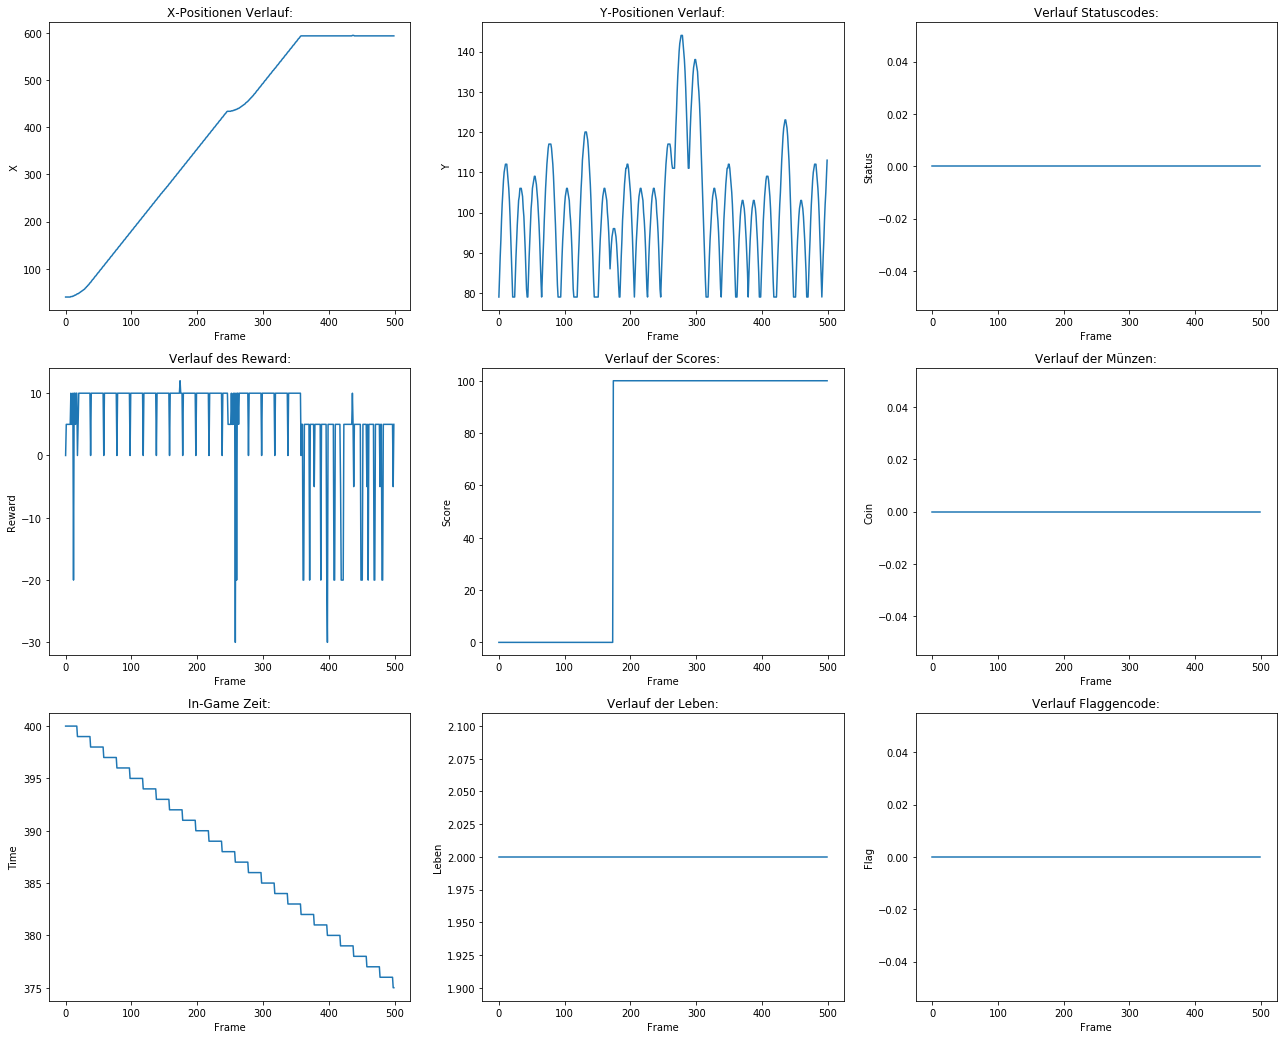

In [13]:
env = SuperMarioBrosEnviorment() # Erzeuge das Enviorment 
videopath = env.monitor() # Nehmm das Gym auf
results = make_test_run(env) # Mach ein Testdurchlauf
env.close() # Beende das Enviorment

show_video(videopath) # Zeige das aufgenomme Video an

plot_rrs(env._reward_records) # Zeige die Reward-Record Statistiken

Zum Vergleich hier ein interessanter Run:

<img src="./INSTRUCTIONS/screenshot_random_statistiks.png" style="float: left;"/>

## Training

Jetzt wird trainiert!

In [ ]:
"""
Kernel crashing atm:

episode = 100
discount_rate = .99
noise = 0.05
noise_decay = 0.99
tmax = 500

# keep track of progress
rewards = []

# keep track of frames
FRAME_SHAPE = (95, 128)
MAX_FRAMES = 4
nn_frames = deque(maxlen=MAX_FRAMES)
for i in range(MAX_FRAMES):
    nn_frames.append(np.zeros(FRAME_SHAPE))
    
action_size = 7 #len(valid_actions)
state_size = (MAX_FRAMES,) + FRAME_SHAPE
agent = DQNAgent(QNetworkDuellingCNN, state_size, action_size, ddqn=True, priority=True)

for e in range(episode):
    obs = env.reset()
    prev_obs = None
    
    for i in range(MAX_FRAMES):
        nn_frames.append(np.zeros(FRAME_SHAPE))
    nn_frames.append(np.copy(preprocess(obs)))
    states = np.array(nn_frames)
    for t in range(tmax):
#         prev_obs = np.copy(obs)
        actions = agent.act(states, noise)
        obs, reward, done, _ = env.step(actions)
        nn_frames.append(np.copy(preprocess(obs)))
        next_states = np.array(nn_frames)
#         next_states = model_preprocess(obs, prev_obs)
        
        agent.step(states, int(actions), int(reward), next_states, int(done))
        states = next_states

        if done or reward < -10:
            break
    
    
    agent.update_error()
    
    # get the average reward of the parallel environments
    noise = noise * noise_decay
    
    rewards.append(env._reward_records)
    
    print('\rEpisode {}\tCurrent Score: {:.2f}'.format(e, sum_rewards[-1]), end="")
    # display some progress every 20 iterations
    if (e+1) % (episode // 20) ==0:
        print(" | Episode: {0:d}, average score: {1:f}".format(e+1,np.mean(sum_rewards[-20:])))
"""

## Referenzen

- [Super Mario Bros for OpenAi Gym, 2018, Christian Kauten](https://github.com/Kautenja/gym-super-mario-bros)

- [Using Reinforcement Learning to play Super Mario Bros on NES using TensorFlow, 2019, Sebastian Heinz](https://www.statworx.com/de/blog/using-reinforcement-learning-to-play-super-mario-bros-on-nes-using-tensorflow/)

- [Mario Reinforcement Learning (Double DQN), 2019, Sachin Abeywardana](https://github.com/sachinruk/Mario)